In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("xSigmoid_benchmark.csv")
df.steps = df.steps.apply(eval)
df

,algorithm,heuristics,steps
0,BFS,none,"[69, 66, 18, 24, 21, 84, 56, 80, 91, 51, 18, 5..."
1,BFS,FVC,"[83, 103, 121, 153, 158, 113, 163, 163, 153, 1..."
2,BFS,AED,"[46, 148, 23, 99, 21, 21, 62, 25, 84, 105, 74,..."
3,BFS,AEQD,"[46, 46, 46, 46, 78, 78, 78, 78, 46, 78, 78, 7..."
4,BFS,SMD,"[51, 19, 50, 50, 50, 51, 18, 50, 18, 18, 18, 1..."
5,ID-DLS,none,"[9, 76, 26, 14, 82, 27, 61, 3, 28, 59, 65, 44,..."
6,ID-DLS,FVC,"[161, 70, 104, 80, 110, 150, 120, 161, 107, 80..."
7,ID-DLS,AED,"[50, 25, 121, 55, 44, 44, 62, 68, 57, 101, 44,..."
8,ID-DLS,AEQD,"[71, 38, 71, 38, 38, 71, 71, 71, 38, 71, 38, 7..."
9,ID-DLS,SMD,"[75, 42, 9, 42, 43, 75, 10, 75, 42, 9, 9, 9, 7..."


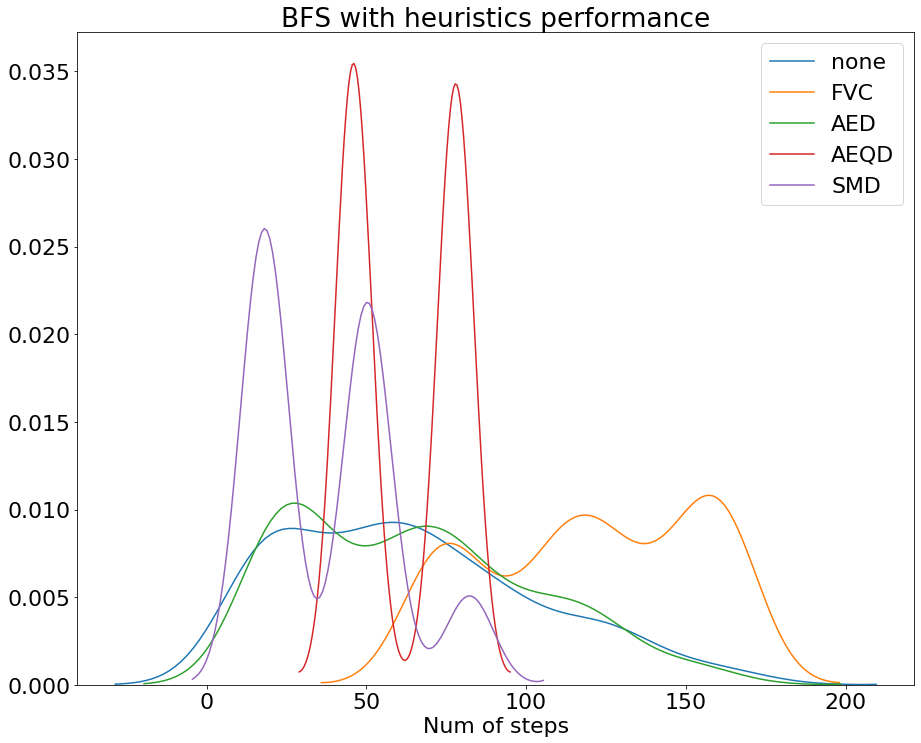

In [3]:
df_bfs = df[df.algorithm == "BFS"][["heuristics", "steps"]]

plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(15, 12))

for _, row in df_bfs[['heuristics', 'steps']].iterrows():
    sns.distplot(row.steps, label=row.heuristics, kde=True, hist=False)
    
plt.legend()
plt.xlabel("Num of steps")
plt.title("BFS with heuristics performance");

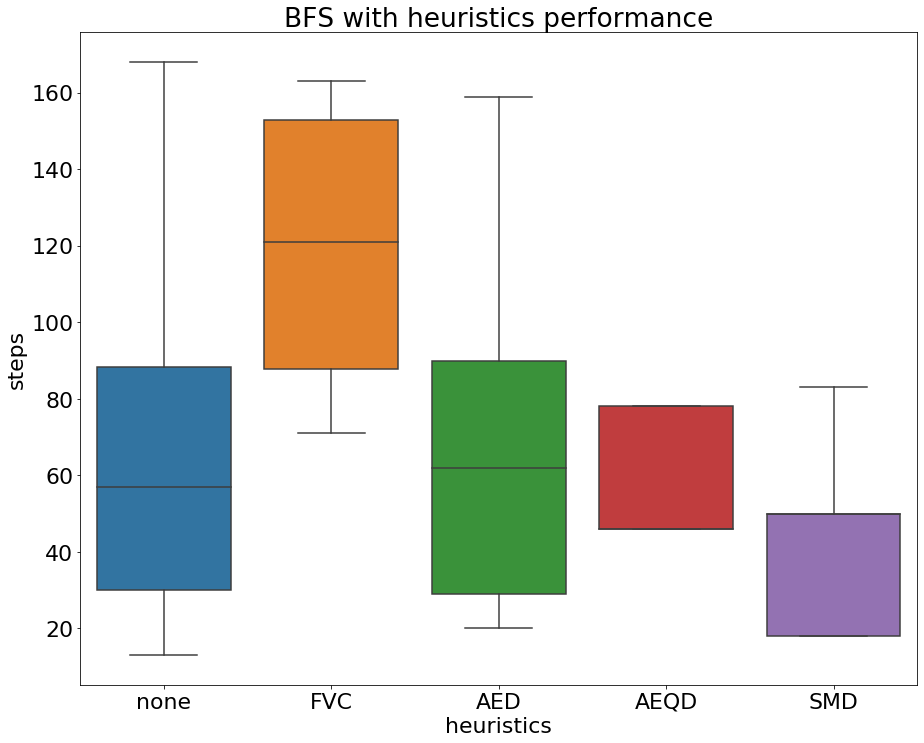

In [4]:
plt.figure(figsize=(15, 12))
sns.boxplot("heuristics", "steps", data=df_bfs.explode("steps"))
plt.title("BFS with heuristics performance");

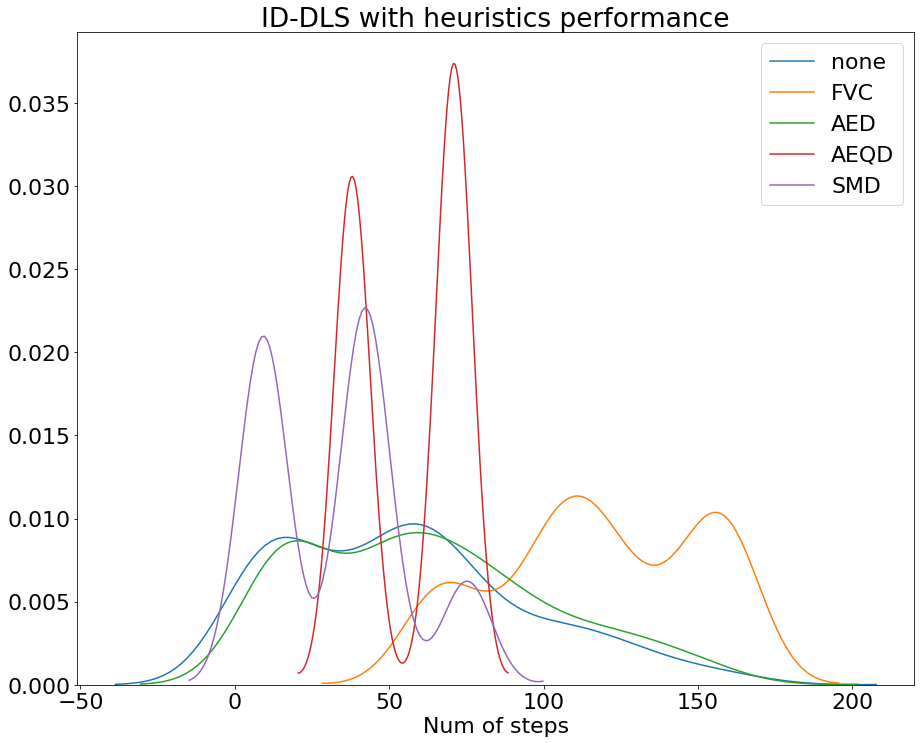

In [5]:
df_iddls = df[df.algorithm == "ID-DLS"][["heuristics", "steps"]]

plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(15, 12))

for _, row in df_iddls[['heuristics', 'steps']].iterrows():
    sns.distplot(row.steps, label=row.heuristics, kde=True, hist=False)
    
plt.legend()
plt.xlabel("Num of steps")
plt.title("ID-DLS with heuristics performance");

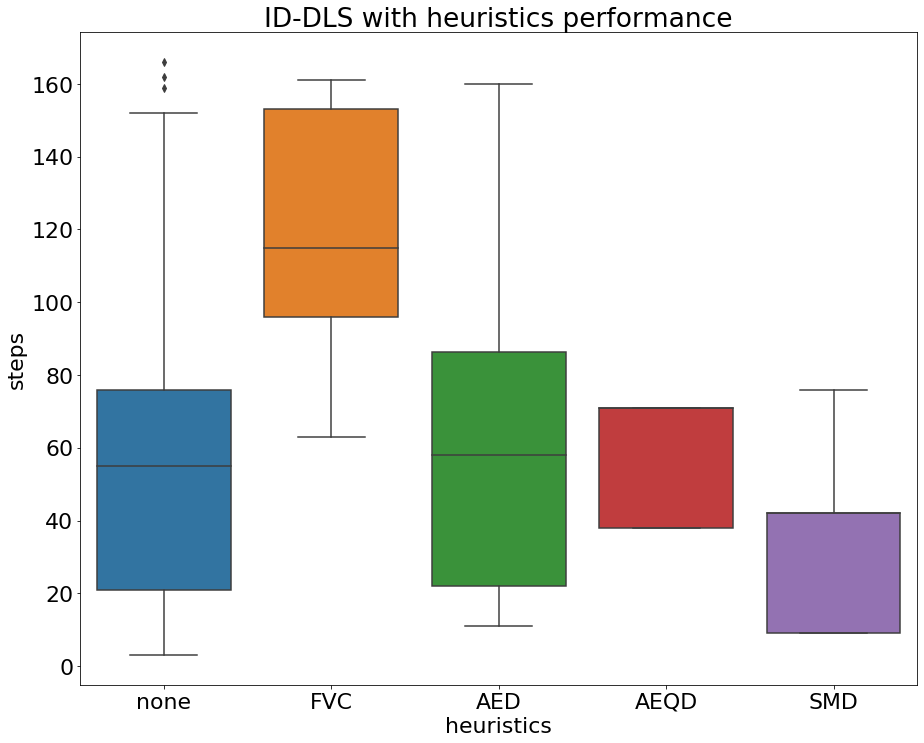

In [6]:
plt.figure(figsize=(15, 12))
sns.boxplot("heuristics", "steps", data=df_iddls.explode("steps"))
plt.title("ID-DLS with heuristics performance");

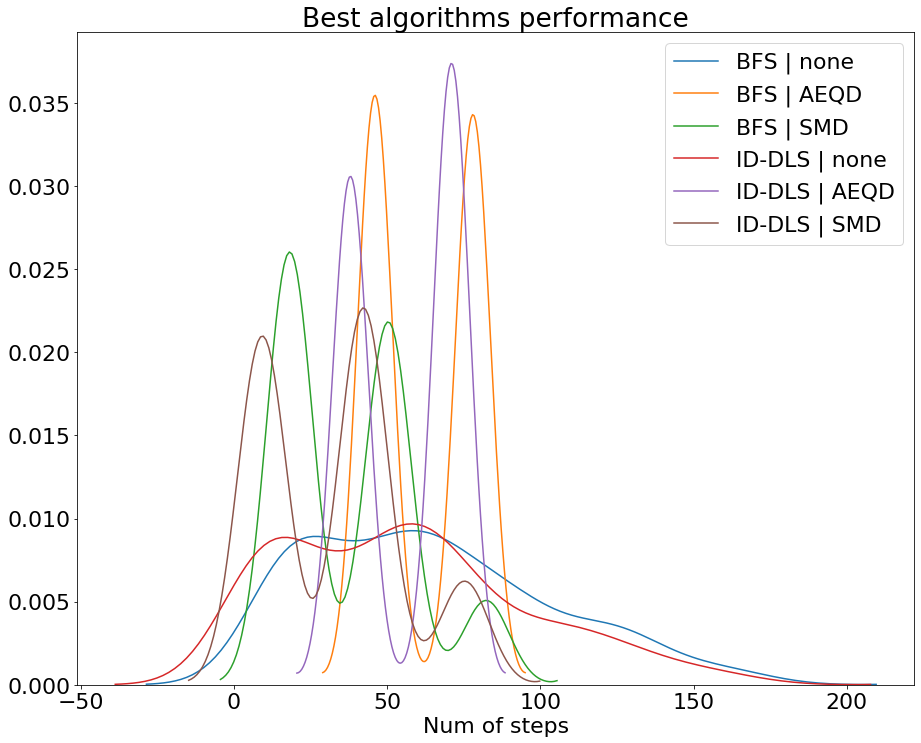

In [7]:
df_best = df[(df.heuristics.isin(["none", "AEQD", "SMD"]))]

plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(15, 12))

for _, row in df_best.iterrows():
    sns.distplot(row.steps, label=f"{row.algorithm} | {row.heuristics}", kde=True, hist=False)
    
plt.legend()
plt.xlabel("Num of steps")
plt.title("Best algorithms performance");

c:\python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


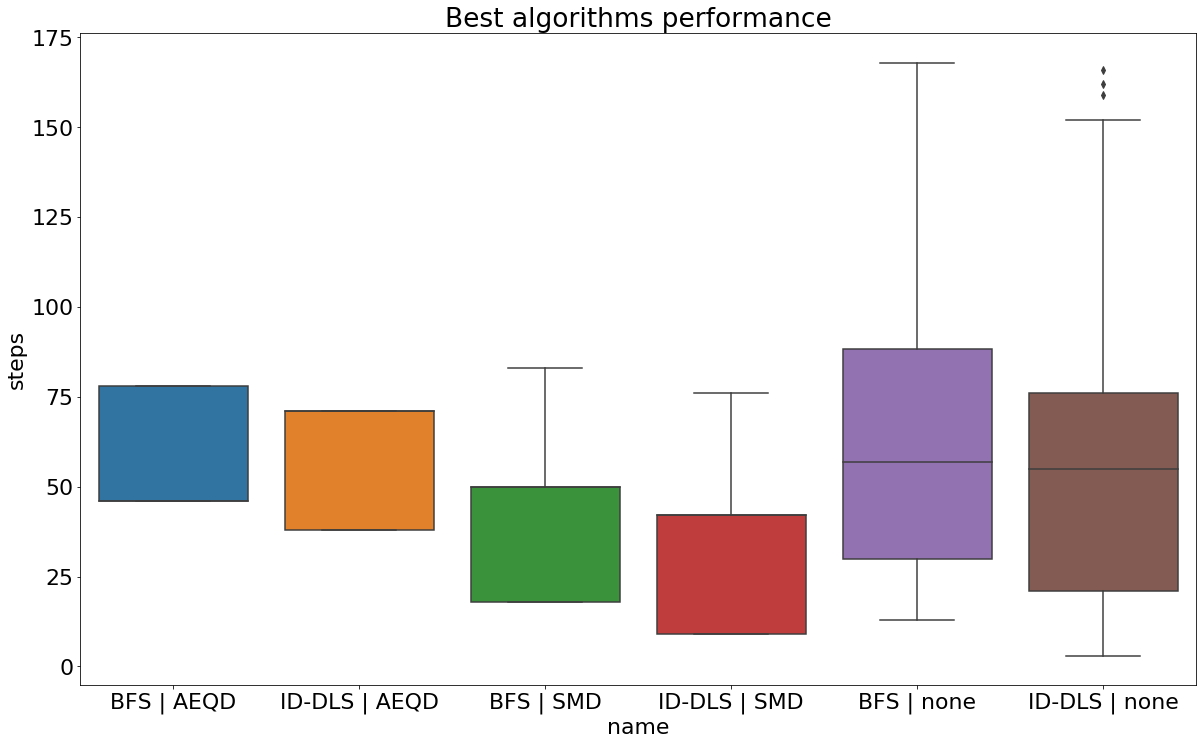

In [8]:
plt.figure(figsize=(20, 12))
df_best["name"] = df_best.apply(lambda ah: f"{ah[0]} | {ah[1]}", axis=1)
sns.boxplot("name", "steps", data=df_best.explode("steps").sort_values(by=["heuristics", "algorithm"]))
plt.title("Best algorithms performance");

In [9]:
smd_iddls = df[(df.algorithm == "ID-DLS") & (df.heuristics == "SMD")].steps.values[0]
bfs_none = df[(df.algorithm == "BFS") & (df.heuristics == "none")].steps.values[0]

print(f"SMD ID-DLS: {np.mean(smd_iddls)} +- {np.std(smd_iddls)}")
print(f"BFS: {np.mean(bfs_none)} +- {np.std(bfs_none)}")

SMD ID-DLS: 32.49583333333333 +- 22.347072499671082
BFS: 64.0875 +- 39.066138497211796


In [10]:
np.mean(bfs_none) / np.mean(smd_iddls)



1.9721759199897426